Read Data

In [16]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np

df = pd.read_csv('./Boston.csv')
print('Size of boston data frame is :',df.shape)
df.head()

Size of boston data frame is : (506, 15)


Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2

# Data Pruning
### 1. Deal with Nan & null values
Count null values

In [17]:
df.isna().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

Dropping first column as it is an index.

In [18]:
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

No null values noted, So we need not prune anything here.

# Feature Scaling
Feature domination for eg:- Black might dominate temperature from above sample.
There are few scaling methods that can scale data reduce feature domination. 

1. Standard Scalar: scales features to 0 mean.
2. MinMax Scalar: scales to 0 to 1 range.
3. QuantileTransformer: Fits data onto a normal distribution and reduces the effects of outliers

Before, we proceed, it would be a good excercise to get some statistical analysis on features.

In [19]:
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

#### Inference :
It is clear from the std deviation that most of the data points are well surrounded around the mean except for zn column. Scaling techniques like MinMacScalar might accidently include the influence of outliers. Nonetheless, we experiment with  
1. Standard Scalar
2. Quantile Transformer

For simplicity, we first experiment with MinMaxScalar.

In [20]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()  # stnadard sclaer will scale some properties of one hot encoded data as well
#scaler = preprocessing.QuantileTransformer() #(ignore_implicit_zeros=True) if used on one-hot encoded
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### Scaled Data

In [21]:
df.iloc[0:10]

crim        zn     indus      chas       nox        rm       age  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
5 -0.417044 -0.487722 -1.306878 -0.272599 -0.835284  0.207096 -0.351157   
6 -0.410243  0.048772 -0.476654 -0.272599 -0.265154 -0.388411 -0.070229   
7 -0.403696  0.048772 -0.476654 -0.272599 -0.265154 -0.160466  0.978808   
8 -0.395935  0.048772 -0.476654 -0.272599 -0.265154 -0.931206  1.117494   
9 -0.400729  0.048772 -0.476654 -0.272599 -0.265154 -0.399808  0.616090   

        dis       rad       tax   ptratio     black     lstat      medv  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  
5  1.077737 -0.752922 -1.106115  0.113032  0.410571 -1.043322  0.671222  
6  0.839244 -0.523001 -0.577519 -1.505237  0.426798 -0.031268  0.039964  
7  1.024638 -0.523001 -0.577519 -1.505237  0.441052  0.910700  0.497082  
8  1.087196 -0.523001 -0.577519 -1.505237  0.328448  2.421774 -0.656595  
9  1.329635 -0.523001 -0.577519 -1.505237  0.329325  0.623344 -0.395385

# Feature Selection
There are multitude of methods for feature selection.
1. Univariate feature selection (with mutual_info_regression)
2. Correlation co-efficient
3. PCA

### 1. Univariate feature selection (with mutual_info_regression)
Selecting top 5 features, we could choose more and try!

In [22]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
X = df.drop(labels=['medv'], axis=1)
y = df[['medv']]
selector = SelectKBest(mutual_info_regression, k=5)
selector.fit(X, y)
X_unv = selector.transform(X)
print("Top 5 columns")
print(X.columns[selector.get_support(indices=True)]) #top 5 columns
df_unv = pd.DataFrame(X_unv, columns=X.columns[selector.get_support(indices=True)])
df_unv.head()

Top 5 columns
Index(['indus', 'nox', 'rm', 'ptratio', 'lstat'], dtype='object')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


indus       nox        rm   ptratio     lstat
0 -1.287909 -0.144217  0.413672 -1.459000 -1.075562
1 -0.593381 -0.740262  0.194274 -0.303094 -0.492439
2 -0.593381 -0.740262  1.282714 -0.303094 -1.208727
3 -1.306878 -0.835284  1.016303  0.113032 -1.361517
4 -1.306878 -0.835284  1.228577  0.113032 -1.026501

#### Obeservations
1. Our 5 top features are 'indus', 'dis', 'rad', 'tax', 'ptratio'

### 2. Correlation coeff.

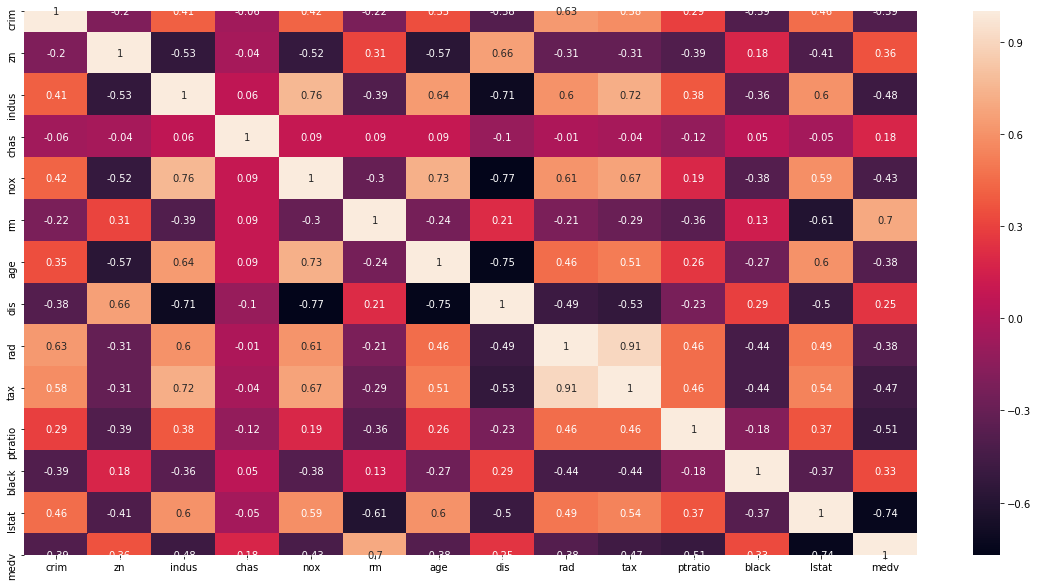

In [23]:
from matplotlib.pyplot import figure
import seaborn as sns 
boston_corr_mat = df.corr().round(2)
figure(figsize = (20,10))

sns.heatmap(data=boston_corr_mat, annot=True)

#### Observations:
1. Clearly none of the features have direct correlation with medv which indicates no feature is leaking any information or is the sole most important feature.
2. Only rad & tax have highest correlations, hence we can choose any one of them.
3. nox and indus have higher correlations, so we could try dropping one of the these features.
4. From unv analysis 'nox' & 'indus' have less correlation with medv. (We could also try dropping them.)

In [24]:
#df.drop(labels=['nox', 'indus'], axis=1, inplace=True)

### 3. PCA Principal Component Analysis

In [25]:
from sklearn.decomposition import PCA
df.head()
X = df.drop(labels=['medv'], axis=1)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(pca.components_,columns=X.columns)
df_pca.head()

crim        zn     indus      chas       nox        rm       age  \
0  0.250951 -0.256315  0.346672  0.005042  0.342852 -0.189243  0.313671   
1 -0.315252 -0.323313  0.112493  0.454829  0.219116  0.149332  0.311978   
2  0.246566  0.295858 -0.015946  0.289781  0.120964  0.593961 -0.017675   
3  0.061771  0.128712  0.017146  0.815941 -0.128226 -0.280592 -0.175206   
4  0.082157  0.320617 -0.007811  0.086531  0.136854 -0.423447  0.016691   

        dis       rad       tax   ptratio     black     lstat  
0 -0.321544  0.319793  0.338469  0.204942 -0.202973  0.309760  
1 -0.349070 -0.271521 -0.239454 -0.305897  0.238559 -0.074322  
2 -0.049736  0.287255  0.220744 -0.323446 -0.300146 -0.267000  
3  0.215436  0.132350  0.103335  0.282622  0.168498  0.069414  
4  0.098592 -0.204132 -0.130461 -0.584002 -0.345607  0.394561

# Split into Train / Test data

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_unv,y,test_size=0.25)

## Training
1. Select models and apply hyper parameters.
2. Use ross validation (k-fold).
//explain
3. Use GridSearch CV
//explain

## Logistic Regression
### Train
About Hyper-Parameters
1. Trying both l1 & l2 regularization penalty
2. Balanced weights as classes are unbalanced

In [27]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

#poly_reg = PolynomialFeatures(degree = 2)
#X_train_reg_poly = poly_reg.fit_transform(X_train)
#X_test_reg_poly = poly_reg.fit_transform(X_test)

# try without polynomial features
X_train_reg_poly = X_train
X_test_reg_poly = X_test
# Hyper parameters

hyperparameters = dict(
    loss=['squared_loss', 'huber'],
    penalty=['l1', 'l2'],
    alpha=[0.1, 0.001, 0.0001, 0.00001],  # Regularization parameter
    learning_rate=['invscaling','optimal','adaptive'], 
    tol=[0.00001, 0.0000001 ],
    max_iter=[1000, 1000000])                   

#hyperparameters=dict()           # dry run

clf = GridSearchCV(SGDRegressor(), hyperparameters, cv=3, verbose=0)
best_model = clf.fit(X_train_reg_poly, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validati

#### Train and print best model

In [28]:
#best_model = clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(best_model.best_params_)

Best parameters set found on development set:

{'alpha': 0.001, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 1000000, 'penalty': 'l2', 'tol': 1e-05}


### Test & F1 score, Accuracy

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test_reg_poly)
mse_lrm=mean_squared_error(y_test, y_pred)
r2_lrm=r2_score(y_test, y_pred)

print('Report :\n')
print('R2', r2_lrm)
print('MSE', mse_lrm)

Report :

R2 0.6702518703933216
MSE 0.2600766889308112


## Decision Trees
### Train
About Hyper-Parameters


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

poly_reg = PolynomialFeatures(degree = 3)
X_train_reg_poly = poly_reg.fit_transform(X_train)
X_test_reg_poly = poly_reg.fit_transform(X_test)

# try without polynomial features
#X_train_reg_poly = X_train
#X_test_reg_poly = X_test
## Hyper parameters

## Hyper parameters

hyperparameters = dict(
    loss=['ls', 'lad'],
    alpha=[0.001, 0.0001, 0.00001],  # Regularization parameter
    tol=[0.0001],
    max_depth=[3,5,7],
    min_impurity_split=[0.00001,0.0000001, 0.000000001])                   

hyperparameters=dict()           # dry run

clf = GridSearchCV(GradientBoostingRegressor(), hyperparameters, cv=3, verbose=0)
best_model = clf.fit(X_train_reg_poly, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validati

### Train and print best model

In [35]:

print("Best parameters set found on development set:")
print()
print(best_model.best_params_)

Best parameters set found on development set:

{}


### Test & F1 score, Accuracy

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test_reg_poly)
mse_lrm=mean_squared_error(y_test, y_pred)
r2_lrm=r2_score(y_test, y_pred)

print('Report :\n')
print('R2', r2_lrm)
print('MSE', mse_lrm)

Report :

R2 0.8456159542307082
MSE 0.12176472841654297


## Conclusion:
**d**